## Dataset com dados da COVID-19

* Link do dataset: https://covid.saude.gov.br/<br>
* Dataset Atualizado 22/04/2020

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cv = pd.read_csv('arquivo_geral.csv',sep=';')

In [3]:
cv.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   regiao            2295 non-null   object
 1   estado            2295 non-null   object
 2   data              2295 non-null   object
 3   casosNovos        2295 non-null   int64 
 4   casosAcumulados   2295 non-null   int64 
 5   obitosNovos       2295 non-null   int64 
 6   obitosAcumulados  2295 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 98.7+ KB


In [5]:
#variaveis por região (Descobrir o que são)
cv['regiao'].value_counts()

Nordeste        765
Norte           595
Sudeste         340
Centro-Oeste    340
Sul             255
Name: regiao, dtype: int64

In [6]:
cv.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2295.000000,2295.000000,2295.000000,2295.000000
mean,21.565142,261.319826,1.443573,14.887582
std,86.173676,1128.679019,7.507580,80.620974
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,9.000000,79.500000,0.000000,2.000000
max,1672.000000,16740.000000,211.000000,1345.000000


In [7]:
#Criando um dataframe apenas com o sudeste
cv_sudesde = cv[cv['regiao'] == 'Sudeste']
cv_sudesde.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1360,Sudeste,MG,2020-01-30,0,0,0,0
1361,Sudeste,MG,2020-01-31,0,0,0,0
1362,Sudeste,MG,2020-02-01,0,0,0,0
1363,Sudeste,MG,2020-02-02,0,0,0,0
1364,Sudeste,MG,2020-02-03,0,0,0,0


In [8]:
#Criando um dataframe apenas com o estado de são paulo
cv_sp = cv_sudesde[cv_sudesde['estado'] == 'SP']

In [9]:
#Criando duas series com obitosAcumulados e casosAcumulados
obitosAcumulados = cv_sp[cv_sp['obitosAcumulados'] > 0]['obitosAcumulados']
casosAcumulados = cv_sp[cv_sp['casosAcumulados'] >= 1]['casosAcumulados']

In [34]:
#Setando um grid
sns.set_style("darkgrid")

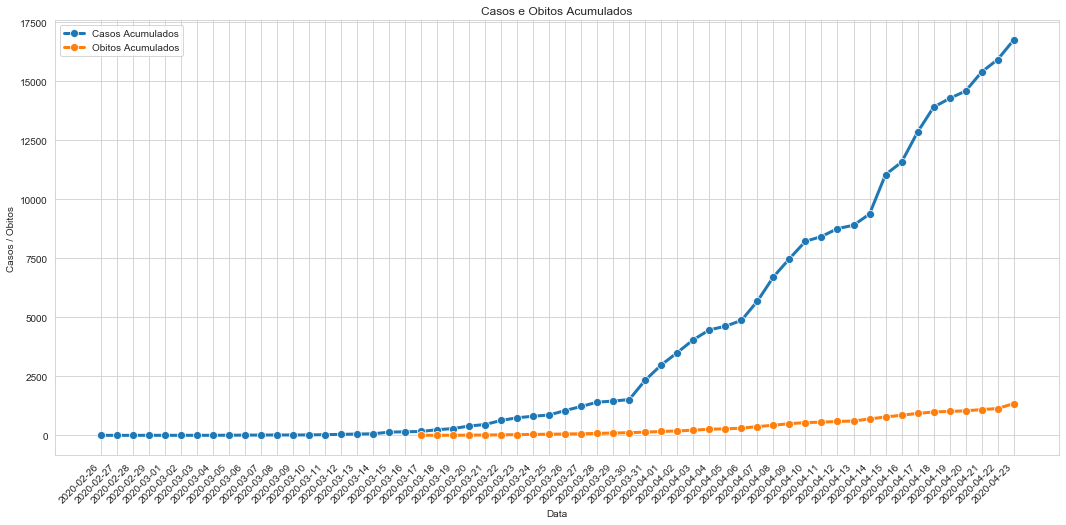

In [11]:
plt.figure(figsize=(18,8))
sns.lineplot(x='data',y=casosAcumulados,data=cv_sp,lw=3,marker='o',markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=obitosAcumulados,data=cv_sp,lw=3,marker='o',markersize=8,label='Obitos Acumulados')

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Casos / Obitos')
plt.xlabel('Data')

plt.legend()
plt.show()

# *VERIFICAR PQ SÓ FUNCIONA USANDO UMA SERIE COM UM ESTADO SÓ!
(testado em um PC 32bits)<br>
TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

              Casos Novos
regiao                   
Sudeste             25583
Nordeste            13381
Norte                5514
Sul                  3191
Centro-Oeste         1823


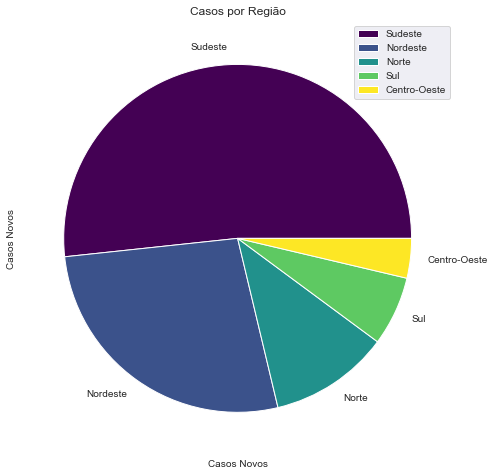

In [47]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Novos']

print(total_casos_por_regiao)

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='viridis')
plt.title('Casos por Região')
plt.xlabel('Casos Novos')
plt.show()

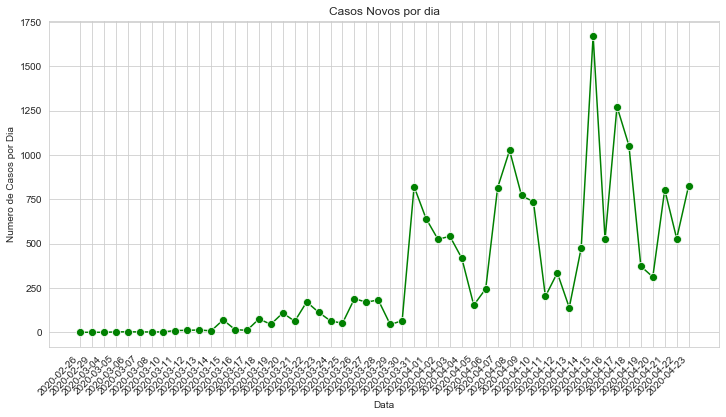

In [13]:
#Fazer grafico de casos por dia
casosNovos = cv_sp[cv_sp['casosNovos'] >= 1]['casosNovos']
plt.figure(figsize=(12,6))
sns.lineplot(x='data',y=casosNovos,data=cv_sp,marker='o',markersize=8,color='green')

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')


plt.show()

# *VERIFICAR PQ SÓ FUNCIONA USANDO UMA SERIE COM UM ESTADO SÓ!
(testado em um PC 32bits)<br>
TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

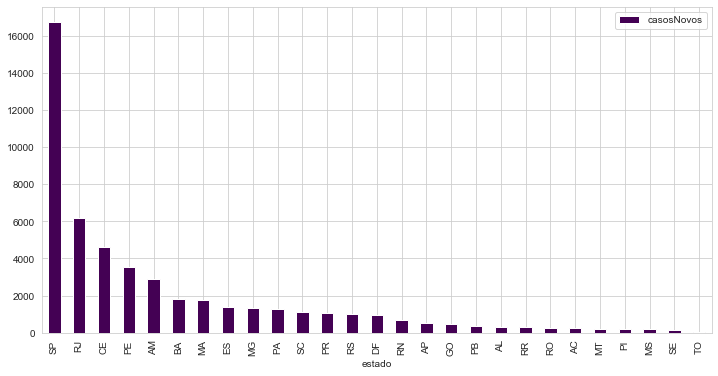

In [14]:
#Fazer grafico de casos por estados
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_estado.plot(kind='bar',figsize=(12,6),cmap='viridis')
plt.show()

# *Fazer esse cara com seaborn
mesmo erro dos outros graficos

In [15]:
#Casos por semana

In [16]:
#Pensar em mais informações

# ------------------------------------------------------------------------------------<br>
### A partir daqui as coisas parecem estar dando certo<br>

In [17]:
#Objetivo: extrair e somar as casos acumulados nos dias


In [21]:
#ATENÇÂO:
#Esta é uma tentativa de criar um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados

for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())

#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

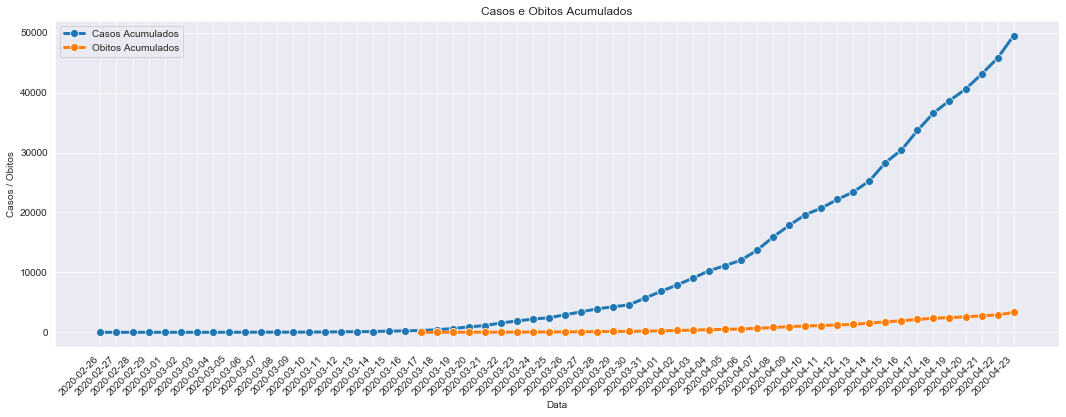

In [35]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,6))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',markersize=8,label='Obitos Acumulados')

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Casos / Obitos')
plt.xlabel('Data')

plt.legend()
plt.show()

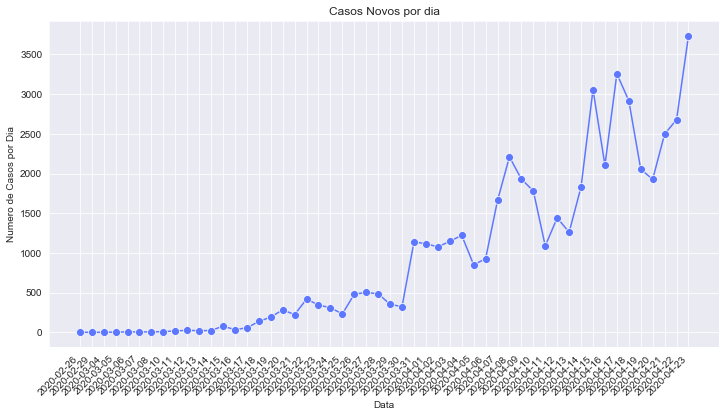

In [36]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

plt.figure(figsize=(12,6))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] > 0]['casosNovos'],data=df_por_data,marker='o',markersize=8,color='#5D78FF',
            err_style='bars')

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')


plt.show()